# 1. Import necessary libraries

In [11]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 2. Load the datasets

In [12]:
file_path = 'House Price Prediction Dataset.csv'
df = pd.read_csv(file_path)

In [13]:
#Display the first few rows of the dataset
print("Dataset Preview:")
print(df.head())

Dataset Preview:
   Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
0   1  1360         5          4       3       1970  Downtown  Excellent   
1   2  4272         5          4       3       1958  Downtown  Excellent   
2   3  3592         2          2       3       1938  Downtown       Good   
3   4   966         4          2       2       1902  Suburban       Fair   
4   5  4926         1          4       2       1975  Downtown       Fair   

  Garage   Price  
0     No  149919  
1     No  424998  
2     No  266746  
3    Yes  244020  
4    Yes  636056  


In [18]:
#Display column names to identify correct feature columns
print("\nAvailable Columns:")
print(df.columns)



Available Columns:
Index(['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt',
       'Location', 'Condition', 'Garage', 'Price'],
      dtype='object')


**Select the relevant features and target variable**

In [19]:
features = ['Area', 'Bedrooms', 'Bathrooms']  
target = 'Price'  

In [20]:
#Extract feature matrix X and target vector y
X = df[features]
y = df[target]

In [21]:
#Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

***model Training***

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
#Predict on test set
y_pred = model.predict(X_test)

In [25]:
#Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [27]:
print(f"\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared Score (R2print): {r2:.2f}")


Model Evaluation:
Mean Squared Error (MSE): 78440549944.81
R-squared Score (R2print): -0.01


In [28]:
#Display the model coefficients
print("\nModel Coefficients:")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef:.2f}")
print(f"Intercept: {model.intercept_:.2f}")


Model Coefficients:
Area: -0.10
Bedrooms: -13.26
Bathrooms: -9759.66
Intercept: 561284.04


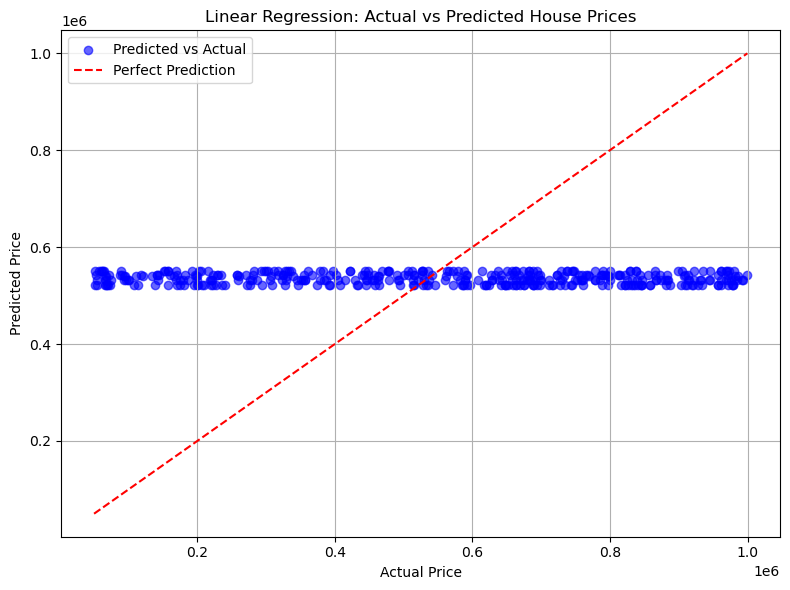

(None,
 78440549944.81049,
 -0.008248471565956539,
 561284.0391500255,
 array([-9.54095578e-02, -1.32595377e+01, -9.75966118e+03]))

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression: Actual vs Predicted House Prices')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show(), mse, r2, model.intercept_, model.coef_